<font color=gray>ADS Sample Notebook.

Copyright (c) 2019 Oracle, Inc.  All rights reserved.
Licensed under the Universal Permissive License v 1.0 as shown at https://oss.oracle.com/licenses/upl.
</font>

***
# <font color=red>Data Visualization with ADS SDK </font>
<p style="margin-left:10%; margin-right:10%;">by the <font color=teal> Oracle ADS Team </font></p>

***

## Overview of this Notebook

Data visualization is an important componement of data exploration and data analysis in modern data science practices. An efficient and flexible data visualization tool can provide more insight about the data for data scientists.

This notebook provides a comprehensive coverage for all the data visualization you can do with ADS, including smart data visualization for columns depends on data types.

## Prerequisites:
 - Experience with specific topic: Novice
 - Professional experience: None
 
This overview is intended for beginners in the fields of statistics, data science and machine learning. No formal professional experience is needed to follow along, but the reader should have some basic knowledge of the programming language Python, and introductory statisitcal terminology. 

## Business Uses:
Data visualization is one of the initial steps made to derive value from data. It's also one of the most important steps, as it determines how efficiently analysts can work with data assets, what insights they are able to extract and how their data strategy will develop over time
 - Cleaning your data: data visualization can help our customers to identify outliers easily.
 - Deriving insights from the streams of data: extracting meaningful dependencies and finding patterns in the data will allow companies to solve business problems, drive sales, cut costs and find new revenue streams.
 - Data strategy: from analyzing market and industry, choosing and prioritizing data streams, to selecting tools and sources for data processing and analytics

## Objectives:
By the end of this tutorial, you will know how to:
 - <a href='#setup'>0. Setup</a> the required packages.
 - <a href='#data'>1. Source the Dataset</a> from a host of filesystems and formats.
     - <a href='#sinb'>1.1 Visualize the Dataset Overall</a>: auto-generate the most popular plots for your data types
 - <a href='#explore'>2. Dataset Exploration using Visualization</a> to interpret and internalize the data.
 - <a href='#custom'>3. Custom Plotting Examples </a> Using `ADSDataset`'s built in methods
     - <a href='#lambda'>3.1 Using Lambdas to Plot </a>
     - <a href='#3d'>3.2 Rendering a 3D Plot </a> 
     - <a href='#pair'>3.3 Using Seaborn's PairPlot Function </a>
     - <a href='#mat'>3.4 Using Matplotlib Functions </a>
     - <a href='#pie'>3.5 Pie Chart </a>
     - <a href='#gis'>3.6 GIS Plot </a> 
 - <a href='#ref'>4. References </a> 
 ***

 <a id='setup'></a>
## 0. Setup
Import the necessary packages:

In [20]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from sklearn.utils import Bunch

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

from ads.dataset.factory import DatasetFactory

import ads
ads.set_debug_mode(True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<a id='data'></a>
## 1. Source the Dataset

<font color=gray> (You can load from: a local or network file system, Hadoop Distributed File System, Amazon S3, Google Cloud Service, Pandas, Dask, or H2O. And in any of the following formats: CSV, TSV, Parquet, libsvm, json, Excel, HDF5, SQL, xml, apache server log files (clf, log))</font>

We're working with oracle classification synthetic dataset, this has a set of features and a `1`/`0` target (`class`)

The oracle_classification_dataset1_150K.csv file is stored here on Oracle ArtiFactory, but the source could be any number of locations, Oracle Storage, HDFS, Git etc. The format and additional options are inferred, however there are many options to control how `open` works. It can also convert any local Pandas DataFrame to a Dataset.

The data contains 150000 rows and 49 columns. The columns describe different attributes of each row.

<font color=gray> If you don't yet know the target in your project, you can explore the data first and set the target later.</font>

Please store and load the dataset from the object storage bucket `env-testing` 
in the `paasdevdatasc` tenancy. Use a pre-authenticated request to pull 
the data from object storage. Pre-authenticated requests should be valid 
for a period of 3 years. 

In [21]:
ds_preview = DatasetFactory.open("data/oracle_classification_dataset1_150K.csv", target="class")

Initializing:0.000s
Loading data:0.091s


Generating data sample:0.103s
Building dataset:0.105s
Running data type discovery:1.894s
Calculating co-correlation of features:0.129s


In [5]:
?DatasetFactory

Init signature: DatasetFactory()
Docstring:      <no docstring>
File:           ~/conda/lib/python3.6/site-packages/ads/dataset/factory.py
Type:           type
Subclasses:     


<a id='sinb'></a>
### Visualize the Dataset Overall

Our `show_in_notebook()` methods gives you a comprehensive preview of all the basic information about this dataset. Including the type of the dataset (whether it's a regression, binary classification or multi-class classification dataset), the number of columns and rows, feature types of each columns, visualization of each column, the correlation map as well as a short dataset header.

In [10]:
ds_preview.show_in_notebook()

Accordion(children=(HTML(value='<h1>Name: oracle_classification_dataset1_150K.csv</h1><h3>Type: BinaryClassifi…

 <a id='explore'></a>
## 2. Dataset Exploration using Visualization

### Plot target distribution

Let's take a look at the distribution of the target column. 

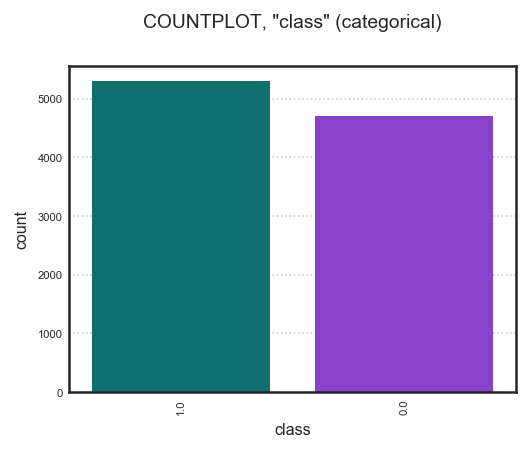

In [4]:
ds_preview.target.show_in_notebook()

In the above cell, the target column `count` is a categorical value, therefore our smart data visualization tool picked `count plot` as the plotting method. The about count plot shows that the count of class 1 is more than the count of class 0.

### Plot a distribution for a set of features vs target variable

Next, we are going to plot a set of features agains the target feature by specifying a list of feature names in the parameter `feature_names` in the method of `show_in_notebook`

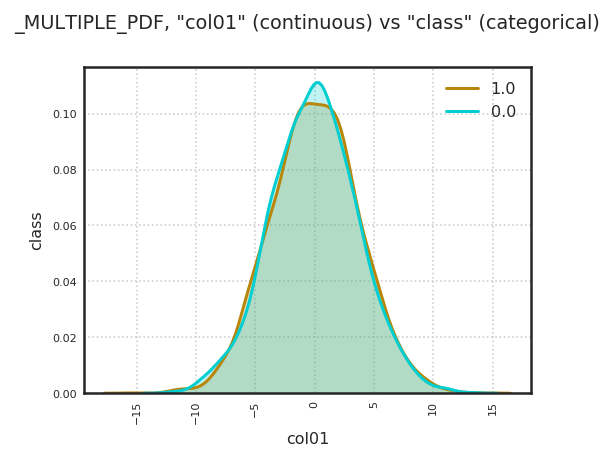

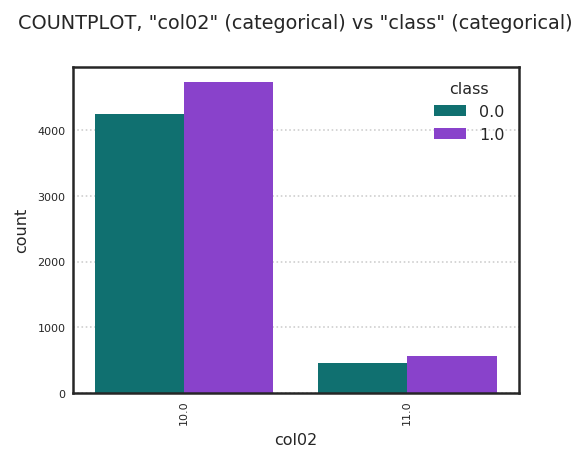

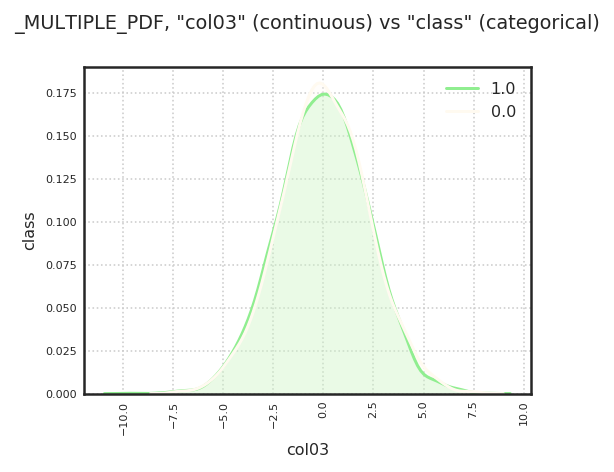

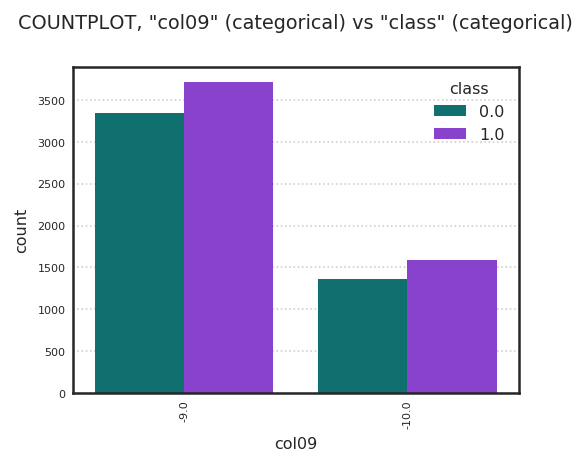

In [22]:
ds_preview.target.show_in_notebook(
    feature_names=["col01", "col02", "col03", "col09"])

The above cell shows that given different type of features, our ADS SDK picked different plotting method. When plotting `col01` against `class`, with `col01` being a continuous variable, it makes most sense to plot a PDF plot. Meanwhile, when plotting `col02` against `class`, with `col02` being a categorical variable, it picked count plot.

### Automatic plotting between features using ADS SDK

The plot() method is an automatic plotting method. Users can pass in a variable for the x axis and an optionally a variable for y, and then call `show_in_notebook()` method to plot. Here are some examples using oracle classification synthetic dataset:

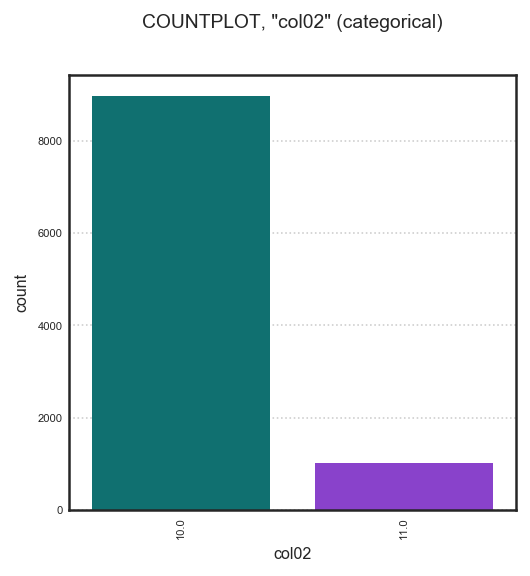

In [6]:
ds_preview.plot("col02").show_in_notebook(figsize=(4,4))

In the above cell, since we only pass the x variable `col02`, which is a categorical variable, our automatic plotting used countplot, a simple and straighforward visualization.

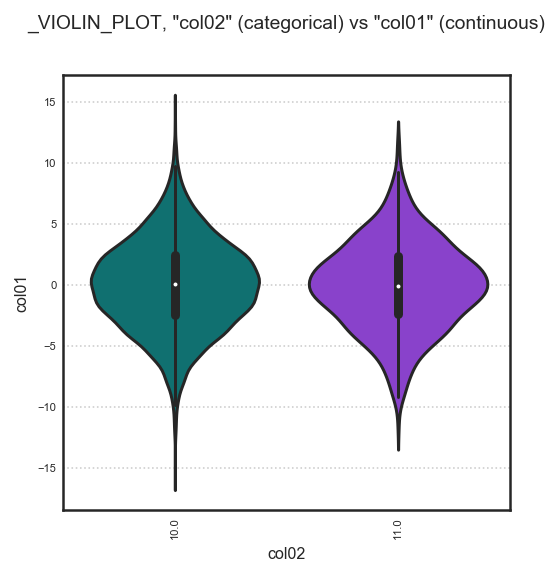

In [7]:
ds_preview.plot("col02", y="col01").show_in_notebook(figsize=(4,4))

In this above example, we are plotting `col02` against `col01`, with one being a categorical typed feature and one being a continuous typed feature, the best plotting method is violin plot.

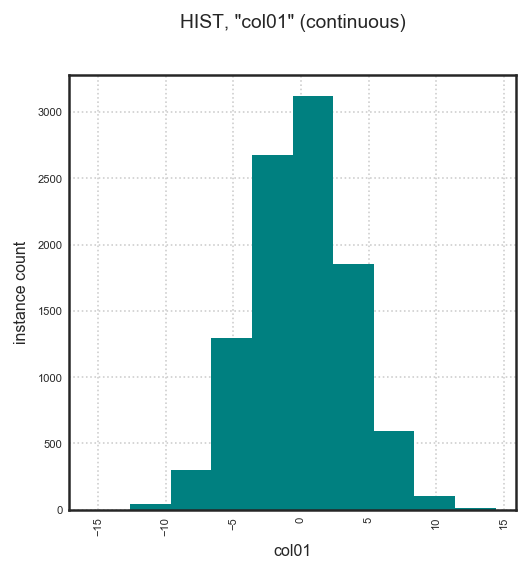

In [8]:
ds_preview.plot("col01").show_in_notebook(figsize=(4,4))

Our automatic plotting use histogram to plot when only plotting `col01`, which is a continuous variable.

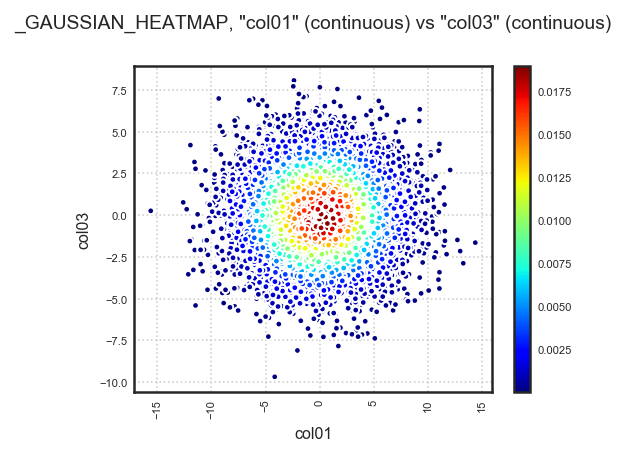

In [9]:
ds_preview.plot("col01", y="col03").show_in_notebook()

When plotting `col01` against `col03`, which are both continuous typed feature, our ADS SDK uses agussian heatmap as the best way to visalize data. It generates a scatter plot and assign a color to each data point based on the local density (gaussian kernel) of points.

As you can probably tell at this point, our ADS SDK can pick the best plotting type based on different data types. Here are some showcase examples using oracle_traffic_timeseries datasets.

In [10]:
oracle_traffic_timeseries = DatasetFactory.open("data/oracle_traffic_timeseries_dataset1.csv")

Initializing:0.000s
Loading data:0.234s


Generating data sample:0.072s
Building dataset with no target:0.048s
Running data type discovery:0.390s
Calculating co-correlation of features:0.014s


In [11]:
oracle_traffic_timeseries.head()

rain_amt_last_hr holiday  sensor9  sensor4  temperature_k  \
0               0.0    None    11.32     2.13         290.72   
1               0.0    None    10.15     2.42         298.54   
2               0.0    None     7.93     2.27         302.85   
3               0.0    None    15.77     2.12         290.88   
4               0.0    None    13.94     2.59         293.21   

            weather  snow_amt_last_hr  sensor3  sensor7  sensor0  \
0        LIGHT_RAIN               0.0     0.60    15.88    21.22   
1     BROKEN_CLOUDS               0.0     2.28     6.91    29.57   
2      SKY_IS_CLEAR               0.0     2.34    13.02     3.44   
3     BROKEN_CLOUDS               0.0     0.44    14.12    28.95   
4  SCATTERED_CLOUDS               0.0     0.06     6.97     6.63   

                  date  sensor1  cloud_coverage  sensor2  sensor6  sensor8  \
0  1988-10-31 17:00:00     0.47              92     1.94      0.0     4.07   
1  1985-07-07 05:00:00     1.18              56     1.36      1.0     3.26   
2  1986-06-06 19:00:00     0.96               0     2.86      1.0     3.22   
3  1987-08-19 19:00:00     2.42              75     2.72      0.0     4.35   
4  1989-08-10 21:00:00     2.00              40     1.16      1.0    -0.11   

   sensor5  405_CAR_COUNT  
0     2.78          26275  
1     2.95           2660  
2     3.02          20820  
3     3.02          16740  
4     2.95          16580

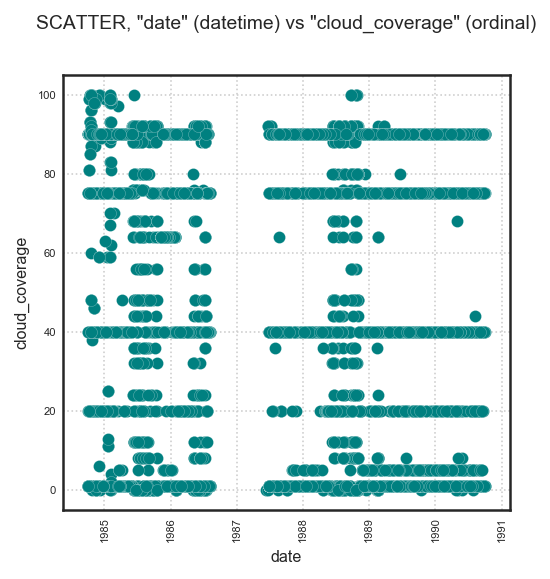

In [12]:
oracle_traffic_timeseries.plot("date", y="cloud_coverage").show_in_notebook(figsize=(4,4))

The above cell visualizes the relationship between `date` and `cloud_coverage` using a scatter plot. It shows how the value of the ordinal variable `cloud_coverage` changes across difefrent years.

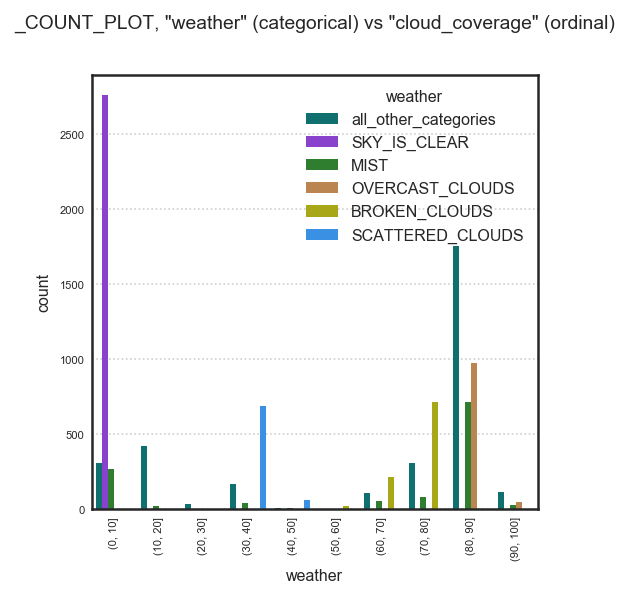

In [13]:
oracle_traffic_timeseries.plot("weather", y="cloud_coverage").show_in_notebook(figsize=(4,4))

By plotting `weather` against `cloud_coverage`, we can visualize the count of different kinds of weather occured in different cloud coverages.

 <a id='custom'></a>
## 3. Custom Plotting
The call() method allows users to have a more flexible way to plotting using their preferred plotting libraries/packages.

<a id='lambda'></a>
### Using Lambdas to Plot

Here is an example of a simple matplotlib scatter plot with the custom fuction being a lambda

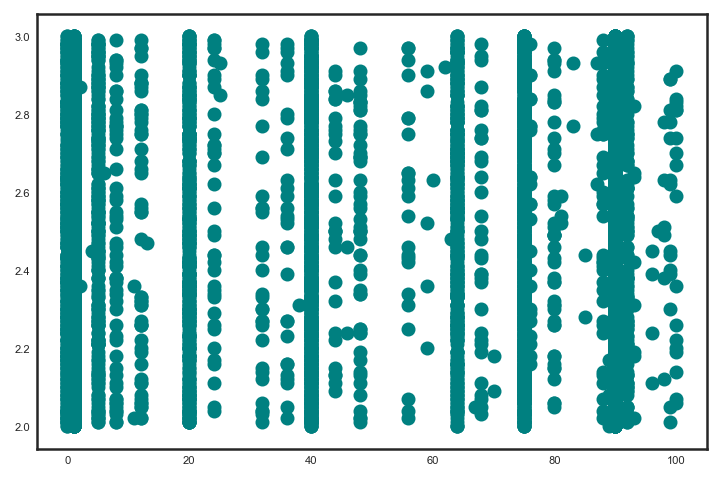

In [14]:
import matplotlib.pyplot as plt
oracle_traffic_timeseries.call(lambda df, x,y: plt.scatter(df[x], df[y]), x='cloud_coverage', y='sensor4')

<a id='3d'></a>
### Rendring a 3D Plot

In [19]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

#load iris dataset
data = load_iris()
iris_df = pd.DataFrame(data.data, columns=data.feature_names)

In [16]:
def my_3d_plot(df, figsize=None):
  plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=1, hspace=1)
  plt.style.use('seaborn-white')

  fig = plt.figure(figsize=figsize)
  ax = fig.add_subplot(111, projection='3d')

  ax.scatter(df['sepal_length_(cm)'], df['sepal_width_(cm)'], df['petal_length_(cm)'])

  ax.set_xlabel('sepal length')
  ax.set_ylabel('sepal width')
  ax.set_zlabel('petal length')


Initializing:0.000s
Loading data:0.058s


Generating data sample:0.039s
Building dataset with no target:0.028s
Running data type discovery:0.054s
Calculating co-correlation of features:0.017s


<Figure size 432x288 with 0 Axes>

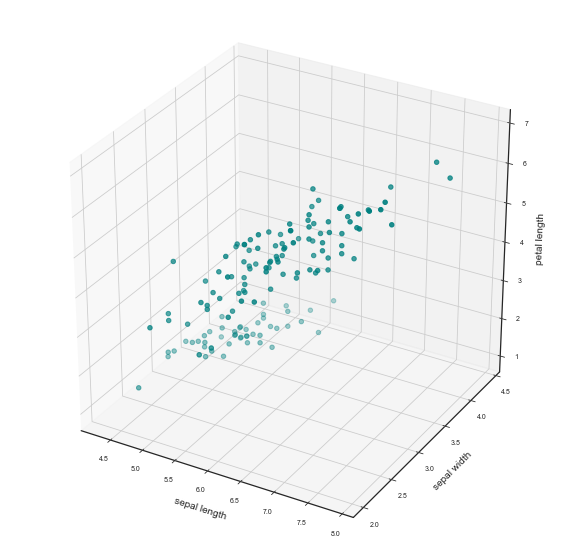

In [17]:
ds = DatasetFactory.from_dataframe(iris_df)
ds.call(my_3d_plot, figsize=(10,10));

<a id='pair'></a>
### Using Seaborn's `pairplot` function 

- in this cell we show how the dataframe is passed directly to the `Seaborn` pair plot function which plots a pairwise relationships in for the dataset. This function will create a grid of Axes such that each variable in data will by shared in the `y-axis` across a single row and in the `x-axis` across a single column. The diagonal Axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column.


Initializing:0.000s
Loading data:0.051s


Generating data sample:0.017s
Building dataset with no target:0.023s
Running data type discovery:0.056s
Calculating co-correlation of features:0.010s


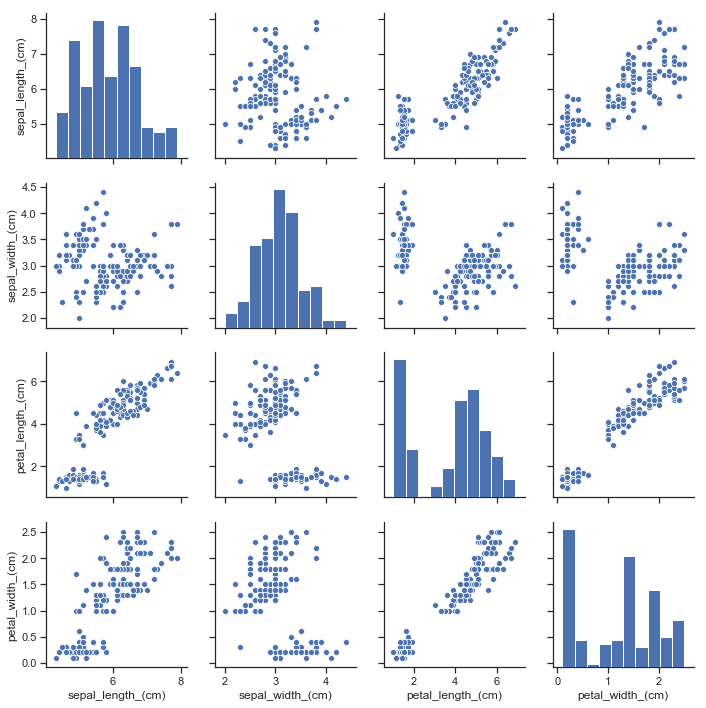

In [18]:
import seaborn as sns; 
sns.set(style="ticks", color_codes=True)
DatasetFactory.from_dataframe(iris_df).call(lambda df: sns.pairplot(df.dropna()))

<a id='mat'></a>
### Using any Matplotlib Function

Initializing:0.000s
Loading data:0.042s


Generating data sample:0.028s
Building dataset:0.036s
Running data type discovery:0.060s
Calculating co-correlation of features:0.026s


<Figure size 432x288 with 0 Axes>

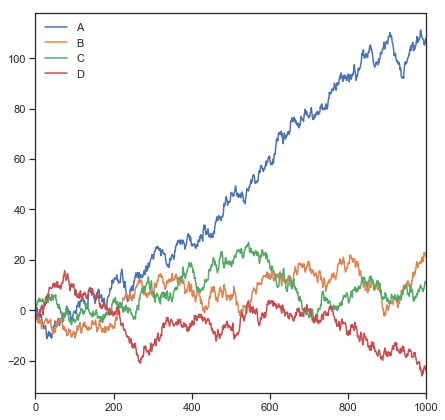

In [19]:
import matplotlib.pyplot as plt
from numpy.random import randn

df = pd.DataFrame(randn(1000, 4), columns=list('ABCD'))

def ts_plot(df, figsize):
    ts = pd.Series(randn(1000), index=pd.date_range('1/1/2000', periods=1000))
    df.set_index(ts)
    df = df.cumsum()
    plt.figure()
    df.plot(figsize=figsize)
    plt.legend(loc='best')
    
ds = DatasetFactory.from_dataframe(df, target='A')
ds.call(ts_plot, figsize=(7,7))

<a id='pie'></a>
### Pie Chart Example

Initializing:0.000s
Loading data:0.040s


Generating data sample:0.030s
Building dataset with no target:0.027s
Running data type discovery:0.017s
Calculating co-correlation of features:0.009s


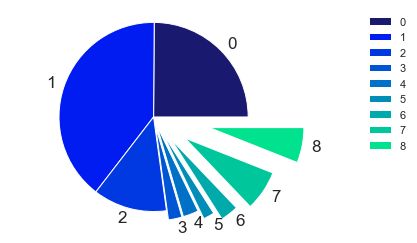

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = {'data': [1109, 696, 353, 192, 168, 86, 74, 65, 53]}
df = pd.DataFrame(data, index = ['20-50 km', '50-75 km', '10-20 km', '75-100 km', '3-5 km', '7-10 km', '5-7 km', '>100 km', '2-3 km'])


explode = (0, 0, 0, 0.1, 0.1, 0.2, 0.3, 0.4, 0.6)
colors = ['#191970', '#001CF0', '#0038E2', '#0055D4', '#0071C6', '#008DB8', '#00AAAA',
          '#00C69C', '#00E28E', '#00FF80', ]

def bar_plot(df, figsize):
    df["data"].plot(kind='pie', fontsize=17, colors=colors, explode=explode)
    plt.axis('equal')
    plt.ylabel('')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

    
ds = DatasetFactory.from_dataframe(df)
ds.call(bar_plot, figsize=(7,7))

<a id='gis'></a>
### GIS Plot Example

Here are some examples where you can visualize geographical data using ADS SDK visualizations.

We are using the California earthquake data retrived from USGS earthquake catalog. 

In [21]:
earthquake = DatasetFactory.open("data/earthquake_01.csv", target="depth")

Initializing:0.000s
Loading data:0.105s


Generating data sample:0.051s
Building dataset:0.039s
Running data type discovery:0.266s
Calculating co-correlation of features:0.252s


A brief overview to visual major places where earthquakes happened. 

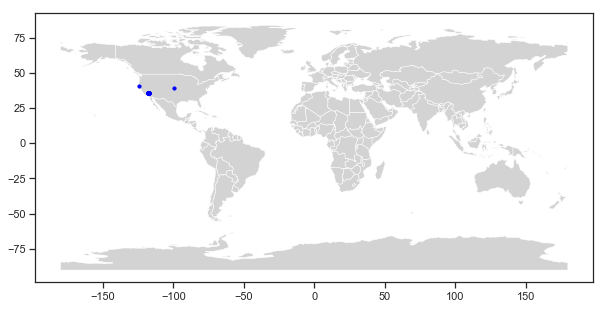

In [22]:
earthquake.plot_gis_scatter(lon="longitude", lat="latitude")

In [23]:
earthquake.head()

time   latitude   longitude  depth   mag magType   nst  \
0  2019-07-07T05:38:15.480Z  35.768167 -117.577833  10.57  4.52      mw  75.0   
1  2019-07-06T23:50:41.990Z  35.823500 -117.663000   6.51  4.50      mw  69.0   
2  2019-07-06T13:06:55.260Z  35.928333 -117.705000   2.37  4.50      mw  64.0   
3  2019-07-06T09:28:28.980Z  35.898000 -117.727167   3.95  4.89      mw  67.0   
4  2019-07-06T08:32:57.550Z  35.639000 -117.491333   3.14  4.56      mw  83.0   

   gap     dmin   rms  ...                   updated  \
0   44  0.05009  0.16  ...  2019-07-10T00:58:23.483Z   
1   28  0.05379  0.14  ...  2019-07-10T22:36:55.696Z   
2   34  0.04844  0.16  ...  2019-07-10T02:02:30.975Z   
3   37  0.08960  0.16  ...  2019-07-08T02:16:43.744Z   
4   24  0.05751  0.15  ...  2019-07-10T00:51:33.098Z   

                            place        type horizontalError depthError  \
0    16km W of Searles Valley, CA  earthquake            0.13       0.27   
1        23km N of Ridgecrest, CA  earthquake            0.11       0.30   
2       18km E of Little Lake, CA  earthquake            0.12       0.21   
3     17km ESE of Little Lake, CA  earthquake            0.13       0.38   
4  16km SSW of Searles Valley, CA  earthquake            0.11       0.27   

   magError  magNst    status  locationSource magSource  
0       NaN       6  reviewed              ci        ci  
1       NaN       6  reviewed              ci        ci  
2       NaN       6  reviewed              ci        ci  
3       NaN       6  reviewed              ci        ci  
4       NaN       6  reviewed              ci        ci  

[5 rows x 22 columns]

Here we do minor transformations using pandas so that our earthquake dataset contains the column `location` which has the format of `"(latitude, logitude)"`.

In [24]:
df=earthquake.compute()
earthquake_df=df.assign(location=[*zip(df.latitude, df.longitude)]).astype(str)

Now we can plot the column `location` using `.plot`, which outputs an interactive map that gives you the flexibility to zoom in/out, identify outliers/inliers etc. 

In [25]:
earthquake_02 = DatasetFactory.open(earthquake_df)
earthquake_02.plot("location").show_in_notebook()

Initializing:0.000s
Loading data:0.087s


Generating data sample:0.050s
Building dataset with no target:0.024s
Running data type discovery:0.322s
Calculating co-correlation of features:0.015s


## What's next
The next steps for our ADS SDK visalization include more sophisticated geo plotting and time series plotting. 

## 4. References
<a id='ref'></a>